In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('twitter_training.csv')

In [3]:
df.shape

(74681, 4)

In [4]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.isna().sum()/len(df)

2401                                                     0.000000
Borderlands                                              0.000000
Positive                                                 0.000000
im getting on borderlands and i will murder you all ,    0.009186
dtype: float64

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()/len(df)

2401                                                     0.0
Borderlands                                              0.0
Positive                                                 0.0
im getting on borderlands and i will murder you all ,    0.0
dtype: float64

In [8]:
df['Borderlands'].value_counts()

Borderlands
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands           

In [9]:
df['Positive'].value_counts()

Positive
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [10]:
df.columns = [ 'EntryId', 'GameName' , 'Sentiment' , 'Text']

In [11]:
df.describe()

,EntryId
count,73995.000000
mean,6430.333685
std,3737.655932
min,1.000000
25%,3194.000000
50%,6418.000000
75%,9595.000000
max,13200.000000


In [12]:
df.describe(include = 'all')

,EntryId,GameName,Sentiment,Text
count,73995.000000,73995,73995,73995
unique,NaN,32,4,69490
top,NaN,MaddenNFL,Negative,
freq,NaN,2377,22358,172
mean,6430.333685,NaN,NaN,NaN
std,3737.655932,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3194.000000,NaN,NaN,NaN
50%,6418.000000,NaN,NaN,NaN
75%,9595.000000,NaN,NaN,NaN


In [13]:
non_game_names = ['Microsoft' , 'Verizon' , 'Facebook' , 'johnson & johnson' , 'Amazon' , 'Home Depot','Xbox(X series)', 'PlayStation5 (PS5)','Nvidia','Google']

df = df[~df['GameName'].isin(non_game_names)]

In [14]:
df['GameName'].value_counts()

GameName
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
TomClancysRainbowSix                 2364
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
johnson&johnson                      2324
FIFA                                 2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                          2279
Cyberpunk2077                        2262
RedDeadRedemption(RDR)               2249
Fortnite                 

In [15]:
#filtering out all irrelevent sentiment
df = df[~df['Sentiment'].isin(['Irrelevant'])]

In [18]:
#!pip install nltk
import nltk
#nltk.download()
from nltk.corpus  import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def remove_non_alphabetic(tokens):
    return [word for word in tokens if word.isalpha()]

def stem_words(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

def preprocess_text(text):
    tokens = tokenize(text)
    tokens = remove_stop_words(tokens)
    tokens = remove_non_alphabetic(tokens)
    tokens = stem_words(tokens)
    return tokens

df['Processed_Text'] = df['Text'].apply(preprocess_text)

In [20]:
from collections import Counter
import itertools


all_words = list(itertools.chain(*df['Processed_Text']))
word_counts = Counter(all_words)


repeating_words = {word: count for word, count in word_counts.items() if count > 1}

In [21]:
sentiment_counts = df['Sentiment'].value_counts()

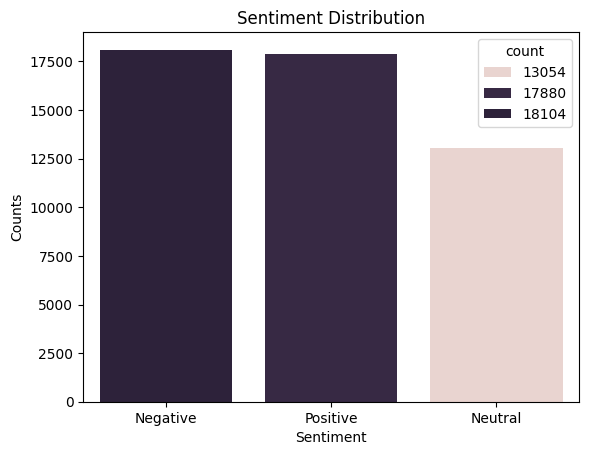

In [22]:
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts)
plt.title('Sentiment Distribution')
plt.ylabel('Counts')
plt.xlabel('Sentiment')
plt.show()

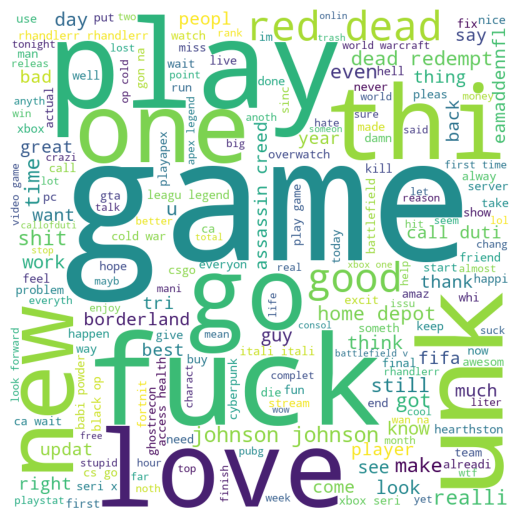

In [24]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(' '.join(all_words))


plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [25]:
from collections import defaultdict, Counter


positive_words = defaultdict(int)
negative_words = defaultdict(int)
neutral_words = defaultdict(int)


for _, row in df.iterrows():
    sentiment = row['Sentiment']
    for word in row['Processed_Text']:
        if sentiment == 'Positive':
            positive_words[word] += 1
        elif sentiment == 'Negative':
            negative_words[word] += 1
        elif sentiment == 'Neutral':
            neutral_words[word] += 1

most_common_positive = Counter(positive_words).most_common(30)
most_common_negative = Counter(negative_words).most_common(30)
most_common_neutral = Counter(neutral_words).most_common(30)

<Figure size 1000x500 with 0 Axes>

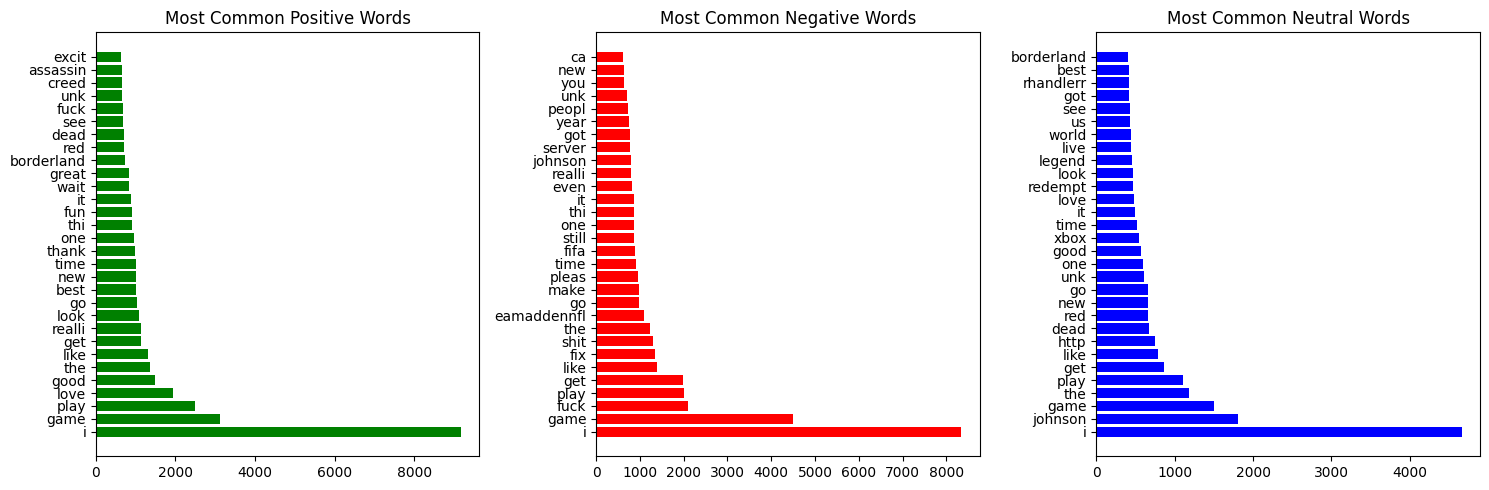

In [26]:
plt.figure(figsize=(10,5))
def plot_most_common_words(most_common, title, ax, color):
    words, counts = zip(*most_common)
    ax.barh(words, counts, color=color)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


plot_most_common_words(most_common_positive, 'Most Common Positive Words', axes[0], 'green')
plot_most_common_words(most_common_negative, 'Most Common Negative Words', axes[1], 'red')
plot_most_common_words(most_common_neutral, 'Most Common Neutral Words', axes[2], 'blue')

plt.tight_layout()
plt.show()

In [27]:
print("Two Most Common Positive Words:", most_common_positive[:2])
print("Two Most Common Negative Words:", most_common_negative[:2])
print("Two Most Common Neutral Words:", most_common_neutral[:2])

Two Most Common Positive Words: [('i', 9183), ('game', 3113)]
Two Most Common Negative Words: [('i', 8347), ('game', 4492)]
Two Most Common Neutral Words: [('i', 4664), ('johnson', 1807)]


In [28]:
game_name_encoder = LabelEncoder()
df['GameName_Encoded'] = game_name_encoder.fit_transform(df['GameName'])
game_name_mapping = dict(zip(game_name_encoder.classes_, game_name_encoder.transform(game_name_encoder.classes_)))

print("Game Name to Number Mapping:")
print(game_name_mapping)

Game Name to Number Mapping:
{'ApexLegends': 0, 'AssassinsCreed': 1, 'Battlefield': 2, 'Borderlands': 3, 'CS-GO': 4, 'CallOfDuty': 5, 'CallOfDutyBlackopsColdWar': 6, 'Cyberpunk2077': 7, 'Dota2': 8, 'FIFA': 9, 'Fortnite': 10, 'GrandTheftAuto(GTA)': 11, 'Hearthstone': 12, 'HomeDepot': 13, 'LeagueOfLegends': 14, 'MaddenNFL': 15, 'NBA2K': 16, 'Overwatch': 17, 'PlayStation5(PS5)': 18, 'PlayerUnknownsBattlegrounds(PUBG)': 19, 'RedDeadRedemption(RDR)': 20, 'TomClancysGhostRecon': 21, 'TomClancysRainbowSix': 22, 'WorldOfCraft': 23, 'Xbox(Xseries)': 24, 'johnson&johnson': 25}


In [29]:
sentiment_encoder = LabelEncoder()
df['Sentiment_Encoded'] = sentiment_encoder.fit_transform(df['Sentiment'])
label_mapping = dict(zip(sentiment_encoder.classes_, sentiment_encoder.transform(sentiment_encoder.classes_)))

print("Sentiment to Number Mapping:")
print(label_mapping)

Sentiment to Number Mapping:
{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['Processed_Text_Joined'] = df['Processed_Text'].apply(lambda x: ' '.join(x))
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Text_Joined'])

In [31]:
df.head()

,EntryId,GameName,Sentiment,Text,Processed_Text,GameName_Encoded,Sentiment_Encoded,Processed_Text_Joined
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[i, come, border, i, kill]",3,2,i come border i kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, get, borderland, kill]",3,2,im get borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, come, borderland, murder]",3,2,im come borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, get, borderland, murder]",3,2,im get borderland murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"[im, get, borderland, murder]",3,2,im get borderland murder


In [32]:
df = df.drop(columns=['EntryId', 'GameName', 'Sentiment', 'Text', 'Processed_Text', 'Processed_Text_Joined'])

In [33]:
df.head()

,GameName_Encoded,Sentiment_Encoded
0,3,2
1,3,2
2,3,2
3,3,2
4,3,2


In [34]:
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle


In [35]:
X = hstack((tfidf_matrix, df[['GameName_Encoded', 'Sentiment_Encoded']].values))
y = df['Sentiment_Encoded']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import confusion_matrix

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
nb_classifier = MultinomialNB()

In [39]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [40]:
predictions = nb_classifier.predict(X_test)

In [41]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score: 0.8990


In [42]:
print('Test-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, predictions)))
y_pred_train = nb_classifier.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))     

Test-set accuracy score: 0.8990
Training-set accuracy score: 0.9214


In [43]:
cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)


print('\nMetrics for Class 0 (Neutral):')
print('True Positives:', cm[0, 0])
print('True Negatives:', cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2])
print('False Positives:', cm[0, 1] + cm[0, 2])
print('False Negatives:', cm[1, 0] + cm[2, 0])

print('\nMetrics for Class 1 (Negative):')
print('True Positives:', cm[1, 1])
print('True Negatives:', cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2])
print('False Positives:', cm[1, 0] + cm[1, 2])
print('False Negatives:', cm[0, 1] + cm[2, 1])


print('\nMetrics for Class 2 (Positive):')
print('True Positives:', cm[2, 2])
print('True Negatives:', cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print('False Positives:', cm[2, 0] + cm[2, 1])
print('False Negatives:', cm[0, 2] + cm[1, 2])

Confusion matrix

 [[5360   24   66]
 [   0 2745 1224]
 [   0  172 5121]]

Metrics for Class 0 (Neutral):
True Positives: 5360
True Negatives: 9262
False Positives: 90
False Negatives: 0

Metrics for Class 1 (Negative):
True Positives: 2745
True Negatives: 10547
False Positives: 1224
False Negatives: 196

Metrics for Class 2 (Positive):
True Positives: 5121
True Negatives: 8129
False Positives: 172
False Negatives: 1290


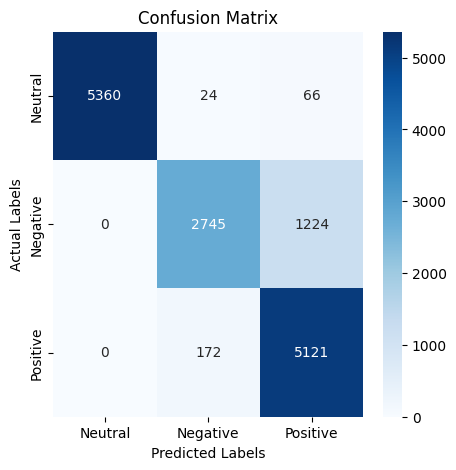

In [45]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral', 'Negative', 'Positive'], yticklabels=['Neutral', 'Negative', 'Positive'])
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()
     